In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import getpass

# Model and train test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Metrics
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [2]:
# Enter password for connection string
password = getpass.getpass()

In [3]:
# Create connection string
conn_string = "postgresql://postgres:" + password + "@b-team-final-project.cct7ahzel1ur.us-west-2.rds.amazonaws.com:5432/B_Team_Final_Project"

In [4]:
# Create the connection
conn=create_engine(conn_string)

/Users/halesoyster/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [5]:
# Import health_outcomes table and drop "countyfips"
health_outcomes = pd.read_sql(
    'health_outcomes',
    conn
)
health_outcomes = health_outcomes.apply(pd.to_numeric)
health_outcomes = health_outcomes.drop("countyfips", axis=1)
health_outcomes

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8


In [6]:
# Import prevention table and drop "countyfips"
prev_df =  pd.read_sql(
    'prevention',
    conn
)
prev_df = prev_df.apply(pd.to_numeric)
prev_df = prev_df.drop("countyfips", axis=1)
prev_df

,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...
3116,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


In [7]:
# Import health_risk_behaviors table and drop "countyfips"
risk_df = pd.read_sql(
    'cancer_health_risk_merged',
    conn
)
risk_df = risk_df.apply(pd.to_numeric)
risk_df = risk_df.drop(columns=["countyfips", "cancer"], axis=1)
risk_df

,density,total_population,binge,csmoking,lpa,sleep
0,94.3,56059,15.0,19.7,32.2,38.4
1,141.8,225463,19.0,19.9,27.6,36.4
2,27.8,24575,13.7,27.8,41.6,40.9
3,36.0,22427,15.6,25.2,37.7,40.1
4,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...
3116,4.0,42226,16.9,17.0,25.2,35.4
3117,5.9,23376,17.5,11.3,18.5,27.1
3118,9.7,20194,17.1,18.8,27.8,35.9
3119,3.5,7793,18.0,17.6,25.9,32.4


In [8]:
# Join the two DataFrames on Index
risk_outcome_df = health_outcomes.merge(risk_df, left_index=True, right_index=True)
risk_outcome_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,density,total_population,binge,csmoking,lpa,sleep
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,94.3,56059,15.0,19.7,32.2,38.4
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,141.8,225463,19.0,19.9,27.6,36.4
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,27.8,24575,13.7,27.8,41.6,40.9
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,36.0,22427,15.6,25.2,37.7,40.1
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,89.9,57997,15.7,22.2,33.3,38.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,4.0,42226,16.9,17.0,25.2,35.4
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,5.9,23376,17.5,11.3,18.5,27.1
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,9.7,20194,17.1,18.8,27.8,35.9
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,3.5,7793,18.0,17.6,25.9,32.4


In [9]:
# Join the third dataset in
combined_data_df = risk_outcome_df.merge(prev_df, left_index=True, right_index=True)
combined_data_df

,arthritis,casthma,bphigh,cancer,highchol,kidney,copd,chd,depression,diabetes,...,access,checkup,dental,bpmed,cholscreen,mammouse,cervical,colon_screen,corem,corew
0,23.0,9.7,34.1,6.1,31.3,3.1,7.1,6.3,21.2,11.8,...,24.2,74.1,61.1,57.9,83.8,71.5,83.0,58.7,25.2,23.7
1,25.6,9.5,33.3,6.5,29.3,2.9,8.0,6.4,21.2,10.7,...,18.9,73.4,57.8,56.8,83.0,68.7,82.2,61.2,24.7,20.6
2,23.7,9.7,32.9,6.4,30.4,2.9,6.7,5.8,19.0,11.0,...,20.5,72.6,59.3,56.8,82.1,69.0,82.6,58.4,24.4,22.3
3,20.0,9.2,29.8,6.0,27.8,2.5,5.0,4.8,17.0,8.3,...,13.6,68.8,68.5,48.5,81.2,67.4,84.1,58.4,20.8,25.1
4,25.7,10.5,36.0,6.6,30.0,3.0,8.4,6.8,23.9,10.5,...,20.5,74.5,58.3,57.7,82.8,69.6,82.3,54.6,25.5,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,11.0,41.0,7.0,33.6,3.3,11.8,8.3,28.4,13.1,...,13.1,79.6,46.9,63.9,87.3,70.6,82.5,63.3,25.9,23.1
3117,24.6,9.3,36.4,6.4,32.5,2.6,5.9,5.3,21.6,10.6,...,18.3,78.9,55.8,63.2,86.8,67.3,87.2,63.1,29.0,21.4
3118,19.4,9.6,27.0,6.1,27.1,2.5,5.7,5.1,15.8,9.8,...,15.0,80.1,67.5,57.7,87.3,76.5,85.5,62.5,17.3,20.2
3119,22.9,9.4,29.6,6.3,28.2,2.6,5.8,5.2,19.7,9.7,...,18.0,74.3,63.4,56.2,83.2,73.4,84.0,59.5,24.6,26.5


In [10]:
# Set features and target
y = combined_data_df["cancer"].values.reshape(-1,1)
X = combined_data_df.drop("cancer", axis=1).values
X.shape

(3121, 28)

In [11]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [12]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2340, 28)
X_test: (781, 28)
Y_train: (2340, 1)
Y_test: (781, 1)


In [13]:
# Instantiate and fit a liner regression model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [14]:
# Create predictions
y_pred=linreg.predict(X_test)
y_pred[:5]

array([[6.17414427],
       [6.60452316],
       [6.13741228],
       [6.37959851],
       [6.56766597]])

In [15]:
# Print the accuracy score
Accuracy=r2_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.91


In [16]:
# Mean squared error
MSE = mean_squared_error(y_test,y_pred)
MSE

0.013968118375653244

In [17]:
# Root mean squared error
RMSE = math.sqrt(MSE)
print(RMSE)

0.11818679442159874


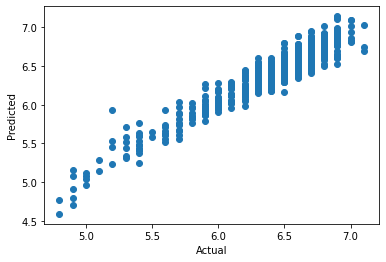

In [18]:
# Plot actual vs predicted
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


In [19]:
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(y_pred)
accuracy_df = pd.concat([df1, df2], axis = 1)
accuracy_df.columns = ['Actual', 'Predicted']
accuracy_df.head(3)

,Actual,Predicted
0,6.2,6.174144
1,6.5,6.604523
2,6.1,6.137412


In [20]:
accuracy_df['Variance'] = accuracy_df['Actual'] - accuracy_df['Predicted']
accuracy_df.head(3)

,Actual,Predicted,Variance
0,6.2,6.174144,0.025856
1,6.5,6.604523,-0.104523
2,6.1,6.137412,-0.037412


In [44]:
accuracy_df.to_csv('data/accuracy_df.csv', index=False)

In [21]:
fig = px.scatter(accuracy_df, x = 'Actual', y = 'Predicted', trendline = 'ols', trendline_color_override='red',
                color = 'Variance', color_continuous_scale=px.colors.sequential.YlGnBu, width = 700,
                title = 'Predicted vs Actual Results With Linear Regression Line and Variance')
fig.show()

In [22]:
# Get the coeffecients
importance = np.ravel(linreg.coef_)

https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 0.01166
Feature: 1, Score: -0.00133
Feature: 2, Score: -0.00035
Feature: 3, Score: 0.00797
Feature: 4, Score: -0.43861
Feature: 5, Score: 0.08686
Feature: 6, Score: 0.19796
Feature: 7, Score: 0.00730
Feature: 8, Score: -0.14661
Feature: 9, Score: 0.01230
Feature: 10, Score: -0.01658
Feature: 11, Score: 0.31251
Feature: 12, Score: 0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00116
Feature: 15, Score: -0.00051
Feature: 16, Score: 0.00043
Feature: 17, Score: -0.00125
Feature: 18, Score: -0.00129
Feature: 19, Score: -0.00717
Feature: 20, Score: 0.01295
Feature: 21, Score: 0.00348
Feature: 22, Score: 0.00470
Feature: 23, Score: 0.00353
Feature: 24, Score: 0.01545
Feature: 25, Score: -0.00642
Feature: 26, Score: 0.00002
Feature: 27, Score: -0.00430


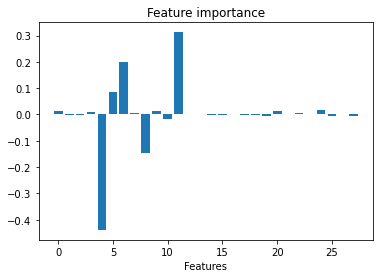

In [23]:
# summarize feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature importance")
plt.xlabel("Features")
plt.show()

[]

<Figure size 300x400 with 0 Axes>

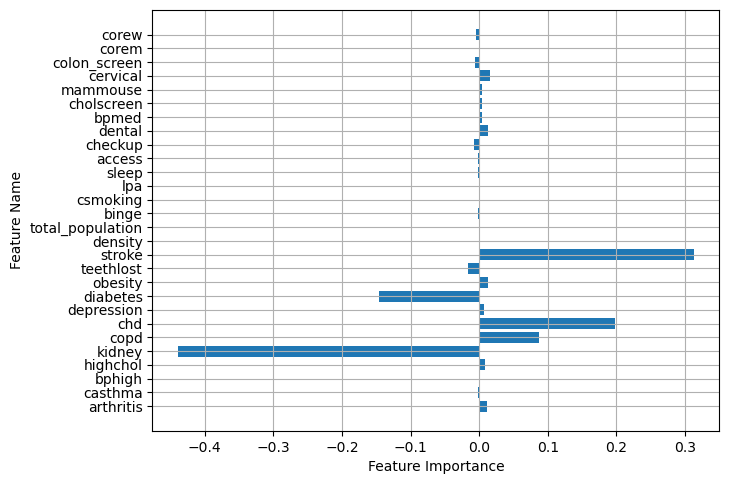

In [24]:
# Create a horizontal barchart of feature importances

#set labels and ticks
y_pos = np.arange(len(importance))
Y_labels = combined_data_df.drop("cancer", axis=1).columns

# Create the chart
plt.rcdefaults()
plt.figure(figsize=(3,4))
fig, ax = plt.subplots()
plt.tight_layout()
plt.grid(True)
ax.barh([x for x in range(len(importance))], importance, align='center', )
ax.set_yticks(y_pos, labels=Y_labels)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
plt.plot()

In [25]:
df1 = pd.DataFrame(importance)
df2 = pd.DataFrame(Y_labels)
feature_df = pd.concat([df1, df2], axis = 1)
feature_df.columns = ['Feature Importance', 'Feature Name']
feature_df.sort_values(by = ['Feature Importance'], inplace = True)

In [45]:
feature_df.to_csv('data/feature_df.csv', index=False)

In [27]:
fig = px.bar(feature_df, x= 'Feature Importance', y = 'Feature Name', orientation = 'h', 
             hover_data = ['Feature Name', 'Feature Importance'], color = 'Feature Importance', 
             color_continuous_scale=px.colors.sequential.Viridis, width = 800, height = 700,
             title = 'Feature Importances Sorted')

fig.show()

# Refactoring

In [28]:
# Dropping columns from X that don't provide weight
dropped_columns_1 = ["corem", "lpa", "csmoking", "total_population", "density", "bphigh","cancer"]
dropped_columns_2 = ["mammouse", "cholscreen", "bpmed", "access", "sleep", "binge", "casthma", "cancer"]
refactored_df = combined_data_df.drop(columns=dropped_columns_1+dropped_columns_2)
refactored_df

,arthritis,highchol,kidney,copd,chd,depression,diabetes,obesity,teethlost,stroke,checkup,dental,cervical,colon_screen,corew
0,23.0,31.3,3.1,7.1,6.3,21.2,11.8,36.3,18.8,3.3,74.1,61.1,83.0,58.7,23.7
1,25.6,29.3,2.9,8.0,6.4,21.2,10.7,38.8,17.2,3.4,73.4,57.8,82.2,61.2,20.6
2,23.7,30.4,2.9,6.7,5.8,19.0,11.0,37.0,17.2,3.1,72.6,59.3,82.6,58.4,22.3
3,20.0,27.8,2.5,5.0,4.8,17.0,8.3,30.7,12.2,2.7,68.8,68.5,84.1,58.4,25.1
4,25.7,30.0,3.0,8.4,6.8,23.9,10.5,36.5,20.6,3.5,74.5,58.3,82.3,54.6,27.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,34.1,33.6,3.3,11.8,8.3,28.4,13.1,42.1,27.7,4.2,79.6,46.9,82.5,63.3,23.1
3117,24.6,32.5,2.6,5.9,5.3,21.6,10.6,37.8,14.2,3.1,78.9,55.8,87.2,63.1,21.4
3118,19.4,27.1,2.5,5.7,5.1,15.8,9.8,29.8,15.3,2.7,80.1,67.5,85.5,62.5,20.2
3119,22.9,28.2,2.6,5.8,5.2,19.7,9.7,35.7,14.1,2.8,74.3,63.4,84.0,59.5,26.5


In [29]:
# Set features and target
y = combined_data_df["cancer"].values.reshape(-1,1)
X = refactored_df.values

In [30]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [31]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2340, 15)
X_test: (781, 15)
Y_train: (2340, 1)
Y_test: (781, 1)


In [32]:
# Instantiate and fit a liner regression model
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [33]:
# Create predictions
y_pred=linreg.predict(X_test)
y_pred[:10]

array([[6.62519887],
       [6.46275857],
       [6.46363241],
       [6.10203221],
       [6.44712013],
       [6.62008797],
       [6.31365867],
       [6.57317341],
       [6.58094392],
       [6.39501908]])

In [34]:
# Print the accuracy score
Accuracy=r2_score(y_test,y_pred)
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 0.88


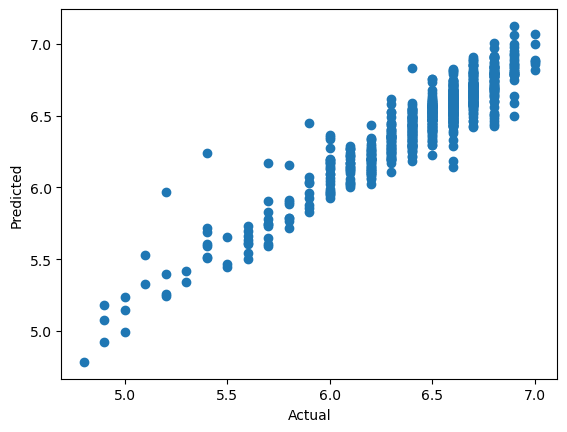

In [35]:
# Plot actual vs predicted
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');


In [36]:
# Get the coeffecients
importance = np.ravel(linreg.coef_)

Feature: 0, Score: 0.01018
Feature: 1, Score: 0.00503
Feature: 2, Score: -0.45929
Feature: 3, Score: 0.08573
Feature: 4, Score: 0.20964
Feature: 5, Score: 0.00785
Feature: 6, Score: -0.14218
Feature: 7, Score: 0.01157
Feature: 8, Score: -0.01871
Feature: 9, Score: 0.31139
Feature: 10, Score: -0.00119
Feature: 11, Score: 0.01149
Feature: 12, Score: 0.02136
Feature: 13, Score: -0.00531
Feature: 14, Score: -0.00292


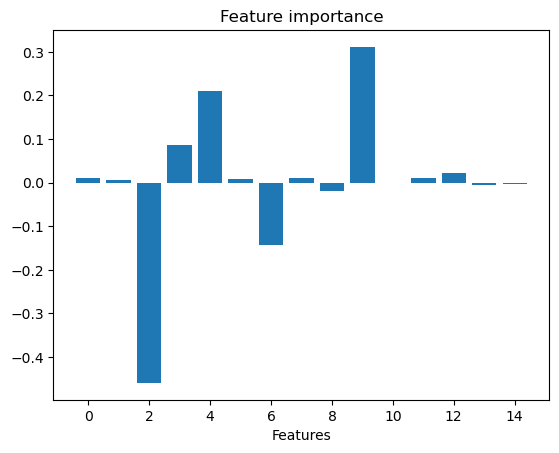

In [37]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature importance")
plt.xlabel("Features")
plt.show()

[]

<Figure size 300x400 with 0 Axes>

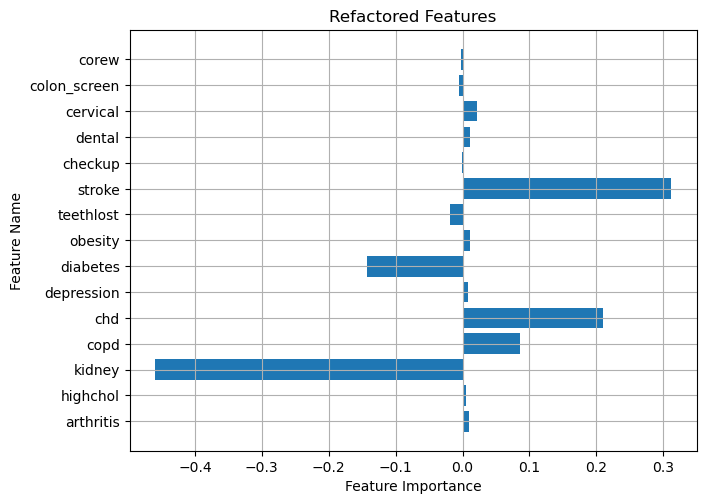

In [38]:
# Create a horizontal barchart of feature importances

#set labels and ticks
y_pos = np.arange(len(importance))
Y_labels = refactored_df.columns

# Create the chart
plt.rcdefaults()
plt.figure(figsize=(3,4))
fig, ax = plt.subplots()
plt.tight_layout()
plt.grid(True)
ax.barh([x for x in range(len(importance))], importance, align='center', )
ax.set_yticks(y_pos, labels=Y_labels)
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature Name')
ax.set_title("Refactored Features")
plt.plot()

## HEATMAP

https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python

In [39]:
# Define a DF for the heatmap
heatmap_df = combined_data_df.drop(columns=["cancer"])

In [40]:
# Get correlation from heatmap_df
corr = heatmap_df.corr(method="spearman")

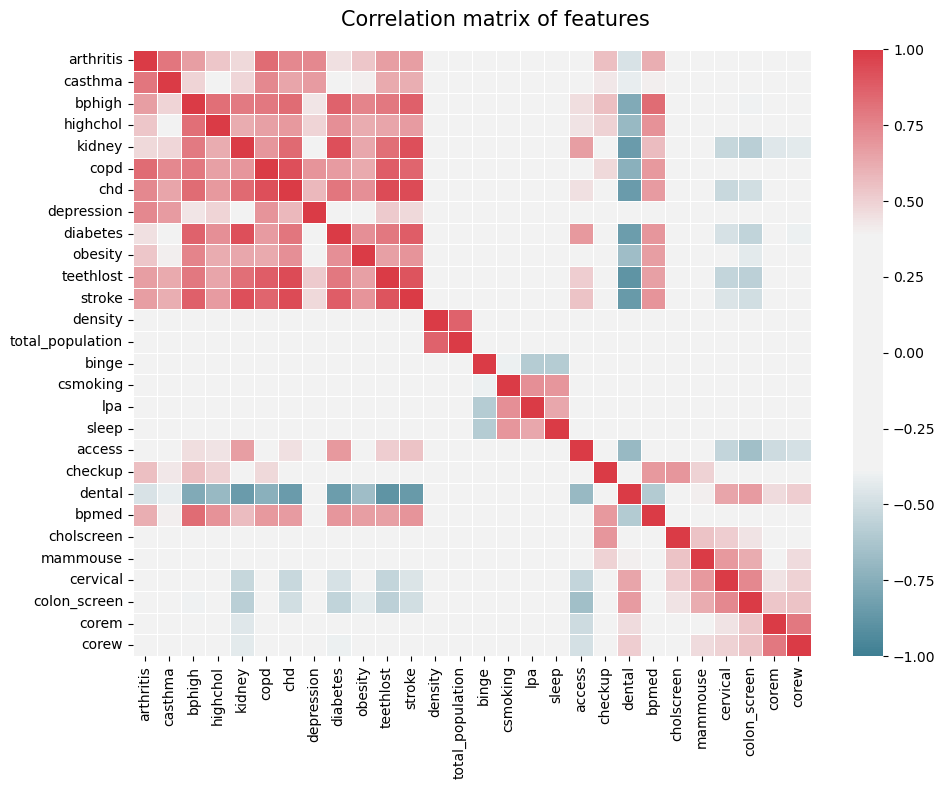

In [41]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5, xticklabels=True,yticklabels=True)

fig.suptitle('Correlation matrix of features', fontsize=15)
fig.tight_layout()

In [42]:
fig = px.imshow(corr, color_continuous_scale='RdBu_r', origin='lower', 
                width = 800, height = 900, title = 'Heatmap of Correlated Features')
fig.show()

## P-VALUES VS CANCER

https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [43]:
# Get the P-values of the data vs Cancer

# Set features and target
y = combined_data_df["cancer"].values.reshape(-1,1)
X = combined_data_df.drop("cancer", axis=1).values

lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.columns)))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
P_value_df = myDF3

index_value = combined_data_df.drop("cancer", axis=1).columns.insert(0, "constant" )
P_value_df.index = index_value
P_value_df

,Coefficients,Standard Errors,t values,Probabilities
constant,3.8315,0.199,19.262,0.000
arthritis,0.0128,0.002,6.785,0.000
casthma,-0.0037,0.006,-0.650,0.516
bphigh,0.0000,0.002,0.002,0.999
highchol,0.0044,0.002,2.036,0.042
kidney,-0.4353,0.028,-15.642,0.000
copd,0.0857,0.005,16.383,0.000
chd,0.1982,0.012,15.989,0.000
depression,0.0088,0.001,6.581,0.000
diabetes,-0.1501,0.005,-29.847,0.000
